In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 18.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [6]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2023-04-09 05:52:15.817141: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [7]:
import os
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import itertools as it
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_lg")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
reviews_df = pd.read_csv('/content/drive/MyDrive/cleanedempty.csv')
reviews_df = reviews_df[['review_clean']]
reviews_df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_clean
0,angry make post available via possible site us...
1,real complaint hotel great great location surr...
2,room nice elderly bit difficult room two story...
3,room dirty afraid walk barefoot floor look cle...
4,book company line show picture room think get ...


In [16]:
reviews_list = reviews_df.review_clean.values.tolist()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
reviews_list[12]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'floor room filfy dirty basic room old tv room fridge work overprice breakfast comfy bed good location'

In [18]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(reviews_list))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
pprint(data_words[:2])

[['angry',
  'make',
  'post',
  'available',
  'via',
  'possible',
  'site',
  'use',
  'plan',
  'trip',
  'one',
  'make',
  'mistake',
  'booking',
  'place',
  'make',
  'book',
  'via',
  'book',
  'com',
  'stayed',
  'night',
  'hotel',
  'july',
  'upon',
  'arrival',
  'place',
  'small',
  'room',
  'floor',
  'hotel',
  'turn',
  'room',
  'book',
  'specially',
  'reserve',
  'level',
  'duplex',
  'room',
  'would',
  'big',
  'window',
  'high',
  'ceiling',
  'room',
  'ok',
  'mind',
  'break',
  'window',
  'close',
  'hello',
  'rain',
  'mini',
  'fridge',
  'contain',
  'sort',
  'bio',
  'weapon',
  'least',
  'guessed',
  'smell',
  'intimately',
  'ask',
  'change',
  'room',
  'explain',
  'time',
  'book',
  'duplex',
  'btw',
  'cost',
  'simple',
  'double',
  'get',
  'way',
  'volume',
  'due',
  'high',
  'ceiling',
  'offer',
  'room',
  'next',
  'day',
  'check',
  'next',
  'day',
  'clock',
  'order',
  'get',
  'room',
  'wan',
  'best',
  'way',
 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['real', 'complaint', 'hotel', 'great', 'great', 'location', 'surroundings', 'room', 'amenity', 'service', 'two', 'recommendation', 'however', 'firstly', 'staff', 'upon', 'check', 'confuse', 'regard', 'deposit', 'payment', 'staff', 'offer', 'upon', 'checkout', 'refund', 'original', 'payment', 'make', 'new', 'one', 'bit', 'confuse', 'secondly', 'site', 'restaurant', 'bit', 'lack', 'well', 'think', 'excellent', 'quality', 'food', 'anyone', 'vegetarian_vegan', 'background', 'even', 'wrap', 'toast', 'sandwich', 'option', 'would', 'great', 'aside', 'minor', 'minor', 'thing', 'fantastic', 'spot', 'back', 'return', 'amsterdam']


In [21]:
stop_words = stopwords.words('english')
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']):#, 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])#, 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['post', 'site', 'use', 'plan', 'trip', 'mistake', 'booking', 'place', 'book', 'book', 'night', 'arrival', 'place', 'room', 'floor', 'hotel', 'turn', 'room', 'book', 'reserve', 'level', 'duplex', 'room', 'window', 'ceiling', 'room', 'mind', 'window', 'rain', 'fridge', 'bio', 'weapon', 'smell', 'change', 'room', 'time', 'book', 'duplex', 'get', 'way', 'volume', 'ceiling', 'room', 'day', 'check', 'day', 'clock', 'order', 'room', 'way', 'holiday', 'order', 'room', 'waist', 'time', 'room', 'garden', 'view', 'window', 'tire', 'wait', 'room', 'place', 'rush', 'city', 'evening', 'noise', 'room', 'vent', 'tube', 'hell', 'stop', 'fall_asleep', 'wife', 'record', 'attach', 'mail', 'day', 'technician', 'cause', 'sound', 'offer', 'change', 'room', 'hotel', 'book', 'room', 'park', 'hotel']]


In [23]:
print(data_lemmatized[:2])

[['post', 'site', 'use', 'plan', 'trip', 'mistake', 'booking', 'place', 'book', 'book', 'night', 'arrival', 'place', 'room', 'floor', 'hotel', 'turn', 'room', 'book', 'reserve', 'level', 'duplex', 'room', 'window', 'ceiling', 'room', 'mind', 'window', 'rain', 'fridge', 'bio', 'weapon', 'smell', 'change', 'room', 'time', 'book', 'duplex', 'get', 'way', 'volume', 'ceiling', 'room', 'day', 'check', 'day', 'clock', 'order', 'room', 'way', 'holiday', 'order', 'room', 'waist', 'time', 'room', 'garden', 'view', 'window', 'tire', 'wait', 'room', 'place', 'rush', 'city', 'evening', 'noise', 'room', 'vent', 'tube', 'hell', 'stop', 'fall_asleep', 'wife', 'record', 'attach', 'mail', 'day', 'technician', 'cause', 'sound', 'offer', 'change', 'room', 'hotel', 'book', 'room', 'park', 'hotel'], ['complaint', 'hotel', 'location', 'surrounding', 'room', 'amenity', 'service', 'recommendation', 'staff', 'check', 'regard', 'deposit', 'payment', 'staff', 'checkout', 'refund', 'payment', 'bit', 'site', 'resta

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
data_lemmatized[12]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['floor',
 'room',
 'room',
 'tv',
 'room',
 'fridge',
 'work',
 'overprice',
 'breakfast',
 'bed',
 'location']

In [25]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
id2word.filter_extremes(no_below=20, no_above=0.4)
id2word.compactify()

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 5), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 3), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 3)]]


In [26]:
id2word[17]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'get'

In [27]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('arrival', 1),
  ('attach', 1),
  ('book', 5),
  ('booking', 1),
  ('cause', 1),
  ('ceiling', 2),
  ('change', 2),
  ('check', 1),
  ('city', 1),
  ('clock', 1),
  ('day', 3),
  ('duplex', 2),
  ('evening', 1),
  ('fall_asleep', 1),
  ('floor', 1),
  ('fridge', 1),
  ('garden', 1),
  ('get', 1),
  ('hell', 1),
  ('holiday', 1),
  ('hotel', 3),
  ('level', 1),
  ('mail', 1),
  ('mind', 1),
  ('mistake', 1),
  ('night', 1),
  ('noise', 1),
  ('offer', 1),
  ('order', 2),
  ('park', 1),
  ('place', 3),
  ('plan', 1),
  ('post', 1),
  ('rain', 1),
  ('record', 1),
  ('reserve', 1),
  ('rush', 1),
  ('site', 1),
  ('smell', 1),
  ('sound', 1),
  ('stop', 1),
  ('technician', 1),
  ('time', 2),
  ('tire', 1),
  ('trip', 1),
  ('tube', 1),
  ('turn', 1),
  ('use', 1),
  ('vent', 1),
  ('view', 1),
  ('volume', 1),
  ('waist', 1),
  ('wait', 1),
  ('way', 2),
  ('wife', 1),
  ('window', 3)]]

In [35]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=75,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
pprint(lda_model.print_topics())


[(0,
  '0.066*"station" + 0.062*"facility" + 0.053*"restaurant" + 0.049*"food" + '
  '0.046*"walk" + 0.037*"minute" + 0.034*"place" + 0.033*"coffee" + '
  '0.030*"lot" + 0.028*"park"'),
 (1,
  '0.065*"night" + 0.064*"time" + 0.064*"day" + 0.051*"book" + 0.045*"check" + '
  '0.045*"pool" + 0.022*"morning" + 0.021*"noise" + 0.020*"thing" + '
  '0.020*"choice"'),
 (2,
  '0.131*"hotel" + 0.125*"location" + 0.095*"breakfast" + 0.065*"bed" + '
  '0.022*"bar" + 0.022*"price" + 0.021*"area" + 0.020*"reception" + '
  '0.018*"work" + 0.016*"bit"'),
 (3,
  '0.234*"service" + 0.090*"charge" + 0.032*"customer" + 0.032*"cost" + '
  '0.029*"call" + 0.029*"upgrade" + 0.026*"card" + 0.025*"member" + '
  '0.020*"birthday" + 0.017*"take"'),
 (4,
  '0.090*"bathroom" + 0.063*"wifi" + 0.047*"shower" + 0.043*"door" + '
  '0.034*"spa" + 0.034*"size" + 0.033*"use" + 0.029*"water" + 0.024*"center" + '
  '0.024*"space"'),
 (5,
  '0.081*"air" + 0.052*"condition" + 0.038*"atmosphere" + 0.037*"request" + '
  '0.035

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
pprint(lda_model.print_topics())

[(0,
  '0.066*"station" + 0.062*"facility" + 0.053*"restaurant" + 0.049*"food" + '
  '0.046*"walk" + 0.037*"minute" + 0.034*"place" + 0.033*"coffee" + '
  '0.030*"lot" + 0.028*"park"'),
 (1,
  '0.065*"night" + 0.064*"time" + 0.064*"day" + 0.051*"book" + 0.045*"check" + '
  '0.045*"pool" + 0.022*"morning" + 0.021*"noise" + 0.020*"thing" + '
  '0.020*"choice"'),
 (2,
  '0.131*"hotel" + 0.125*"location" + 0.095*"breakfast" + 0.065*"bed" + '
  '0.022*"bar" + 0.022*"price" + 0.021*"area" + 0.020*"reception" + '
  '0.018*"work" + 0.016*"bit"'),
 (3,
  '0.234*"service" + 0.090*"charge" + 0.032*"customer" + 0.032*"cost" + '
  '0.029*"call" + 0.029*"upgrade" + 0.026*"card" + 0.025*"member" + '
  '0.020*"birthday" + 0.017*"take"'),
 (4,
  '0.090*"bathroom" + 0.063*"wifi" + 0.047*"shower" + 0.043*"door" + '
  '0.034*"spa" + 0.034*"size" + 0.033*"use" + 0.029*"water" + 0.024*"center" + '
  '0.024*"space"'),
 (5,
  '0.081*"air" + 0.052*"condition" + 0.038*"atmosphere" + 0.037*"request" + '
  '0.035

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
array=lda_model.print_topics()
print(array)

[(0, '0.066*"station" + 0.062*"facility" + 0.053*"restaurant" + 0.049*"food" + 0.046*"walk" + 0.037*"minute" + 0.034*"place" + 0.033*"coffee" + 0.030*"lot" + 0.028*"park"'), (1, '0.065*"night" + 0.064*"time" + 0.064*"day" + 0.051*"book" + 0.045*"check" + 0.045*"pool" + 0.022*"morning" + 0.021*"noise" + 0.020*"thing" + 0.020*"choice"'), (2, '0.131*"hotel" + 0.125*"location" + 0.095*"breakfast" + 0.065*"bed" + 0.022*"bar" + 0.022*"price" + 0.021*"area" + 0.020*"reception" + 0.018*"work" + 0.016*"bit"'), (3, '0.234*"service" + 0.090*"charge" + 0.032*"customer" + 0.032*"cost" + 0.029*"call" + 0.029*"upgrade" + 0.026*"card" + 0.025*"member" + 0.020*"birthday" + 0.017*"take"'), (4, '0.090*"bathroom" + 0.063*"wifi" + 0.047*"shower" + 0.043*"door" + 0.034*"spa" + 0.034*"size" + 0.033*"use" + 0.029*"water" + 0.024*"center" + 0.024*"space"'), (5, '0.081*"air" + 0.052*"condition" + 0.038*"atmosphere" + 0.037*"request" + 0.035*"decor" + 0.035*"visit" + 0.029*"suite" + 0.025*"child" + 0.025*"bottle

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
pip install scikit-learn


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import sklearn


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=reviews_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        print(i)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
468736
468737
468738
468739
468740
468741
468742
468743
468744
468745
468746
468747
468748
468749
468750
468751
468752
468753
468754
468755
468756
468757
468758
468759
468760
468761
468762
468763
468764
468765
468766
468767
468768
468769
468770
468771
468772
468773
468774
468775
468776
468777
468778
468779
468780
468781
468782
468783
468784
468785
468786
468787
468788
468789
468790
468791
468792
468793
468794
468795
468796
468797
468798
468799
468800
468801
468802
468803
468804
468805
468806
468807
468808
468809
468810
468811
468812
468813
468814
468815
468816
468817
468818
468819
468820
468821
468822
468823
468824
468825
468826
468827
468828
468829
468830
468831
468832
468833
468834
468835
468836
468837
468838
468839
468840
468841
468842
468843
468844
468845
468846
468847
468848
468849
468850
468851
468852
468853
468854
468855
468856
468857
468858
468859
468860
468861
468862
468863
468864
468865
468866
468867
468868
468869
468870
4688

In [77]:

df_dominant_topic["Dominant_Topic"].value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

In [ ]:
df_dominant_topic.to_csv('Aftertopicmodelling.csv')

In [40]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.0719305700270745

Coherence Score:  0.579665322887285


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


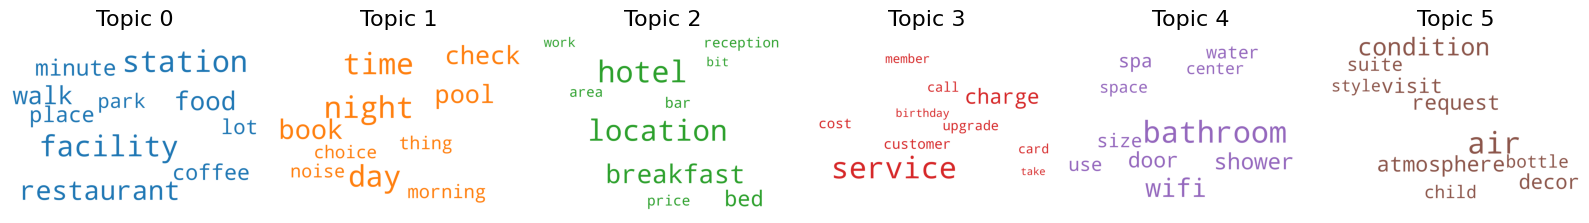

In [54]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 6, figsize=(16,16), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


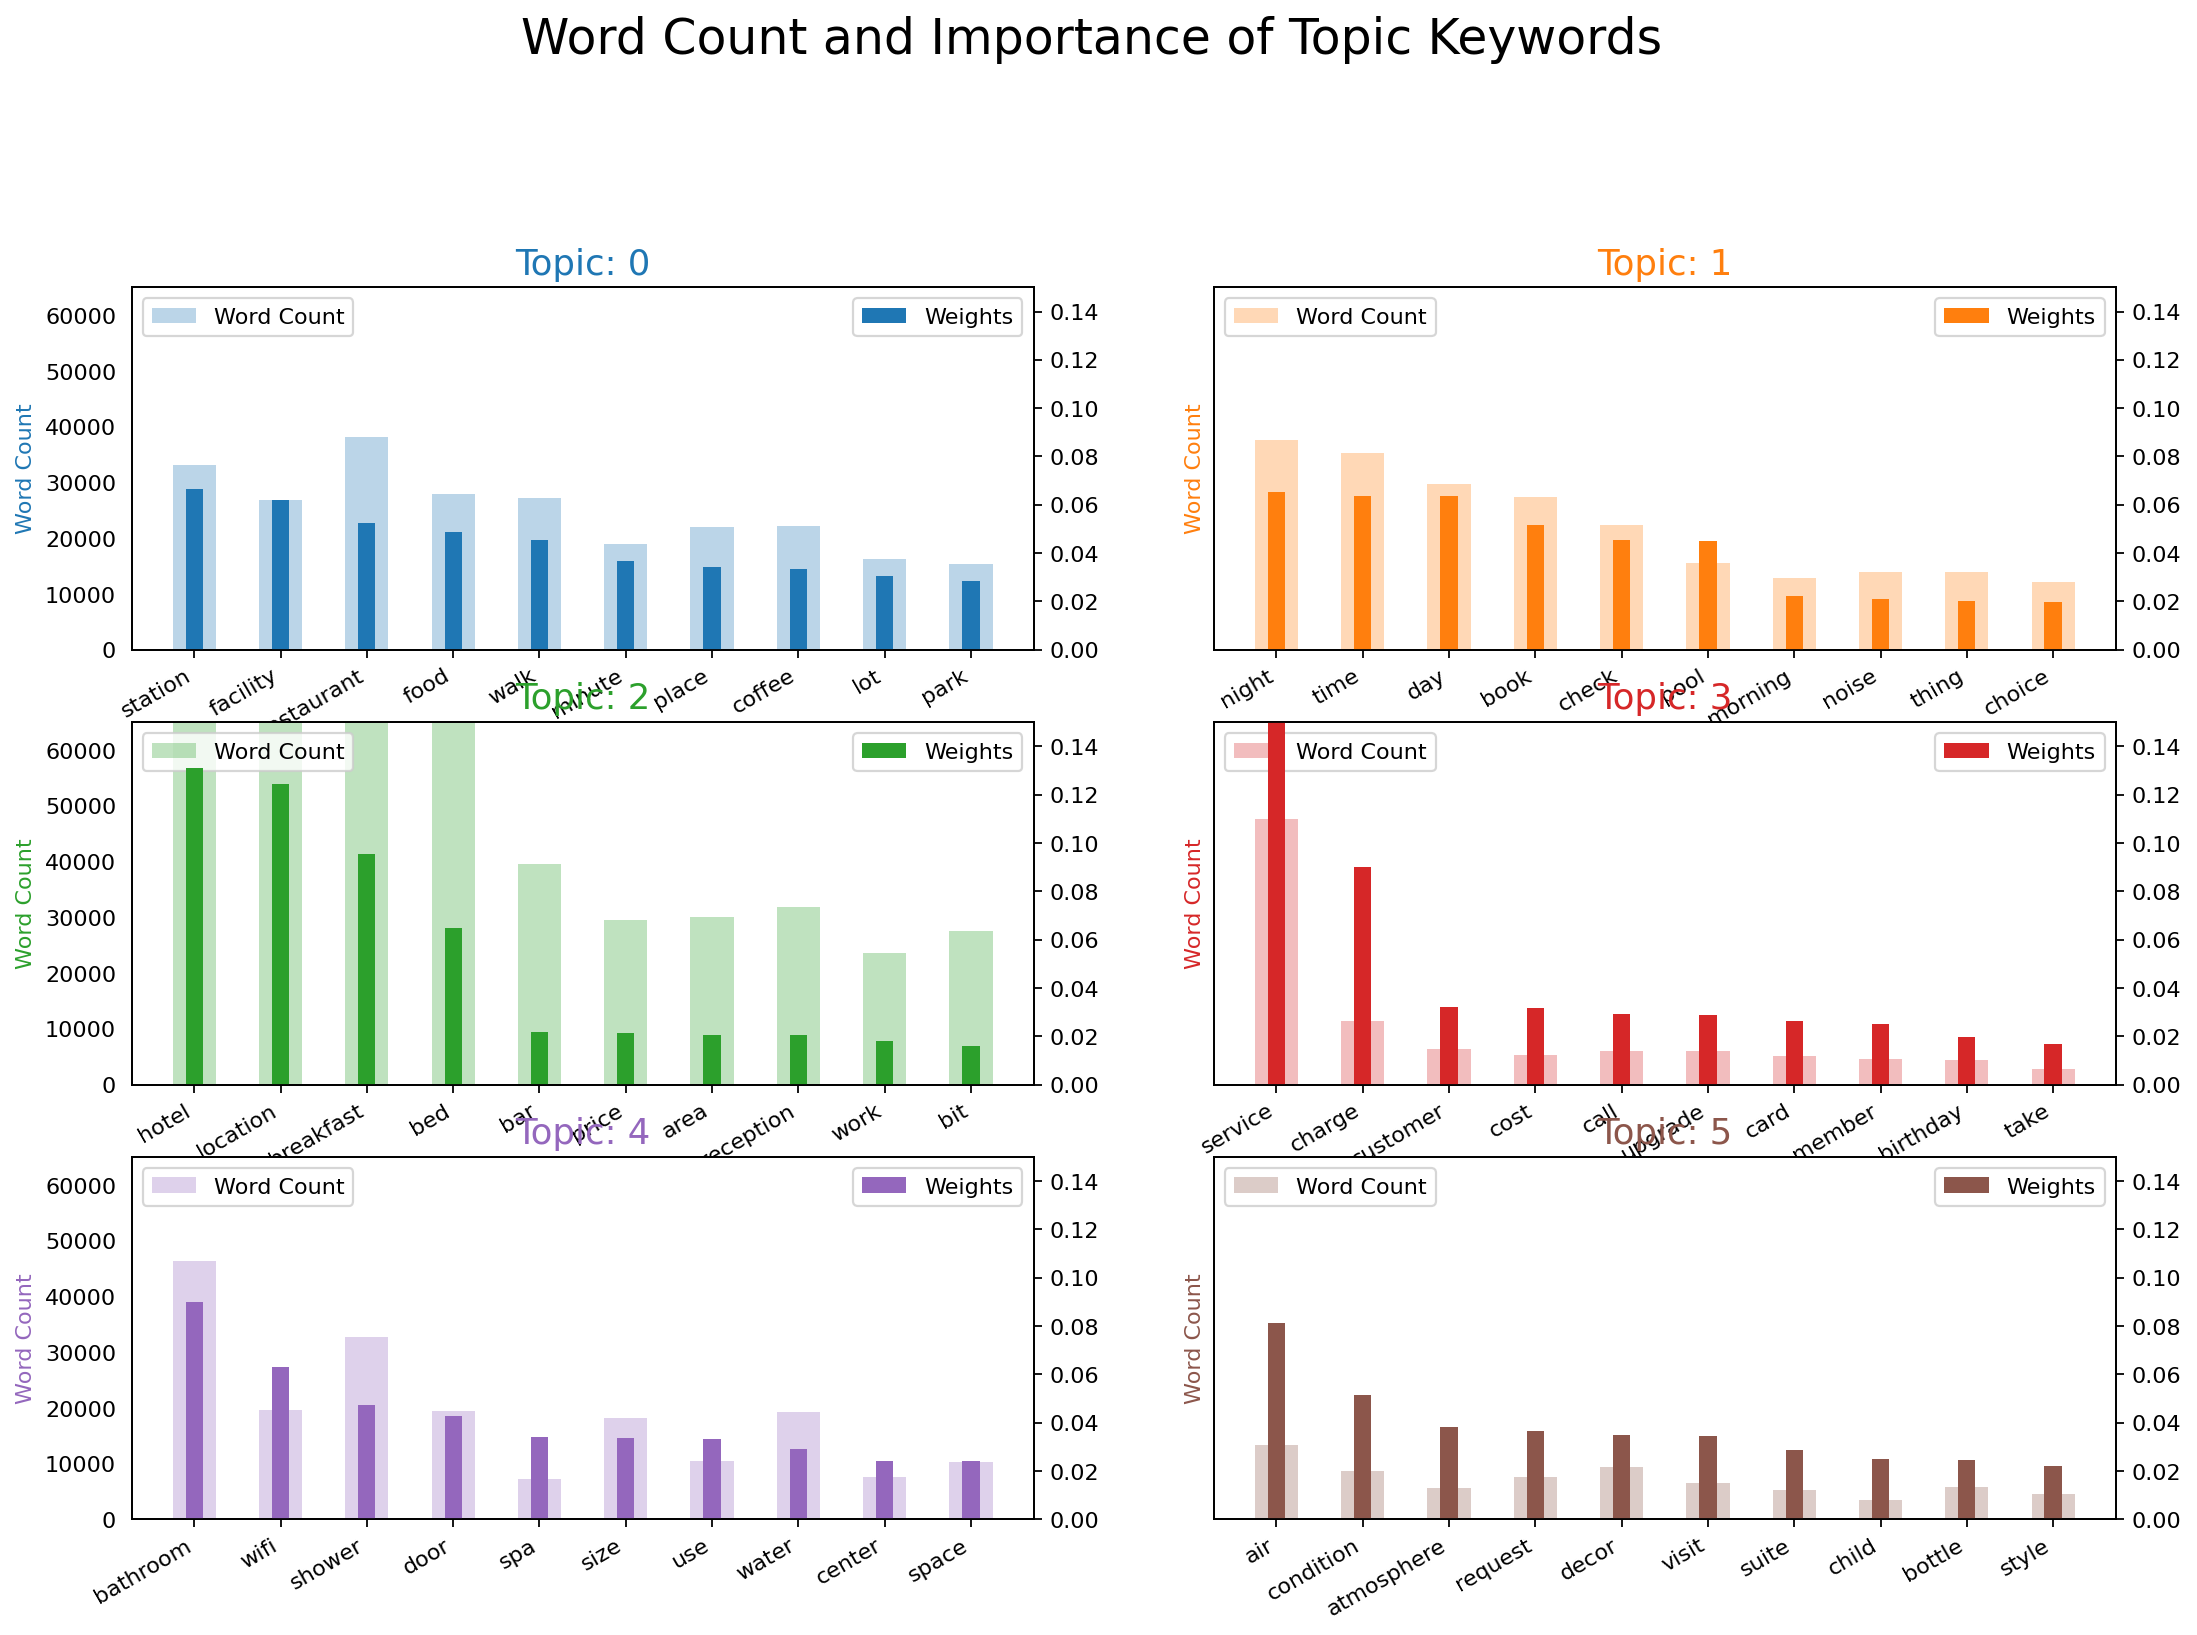

In [55]:
# Word counts of topic keywords
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.150); ax.set_ylim(0, 65000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

#fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [56]:
## To know most discussed topics in the documents

# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 10]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


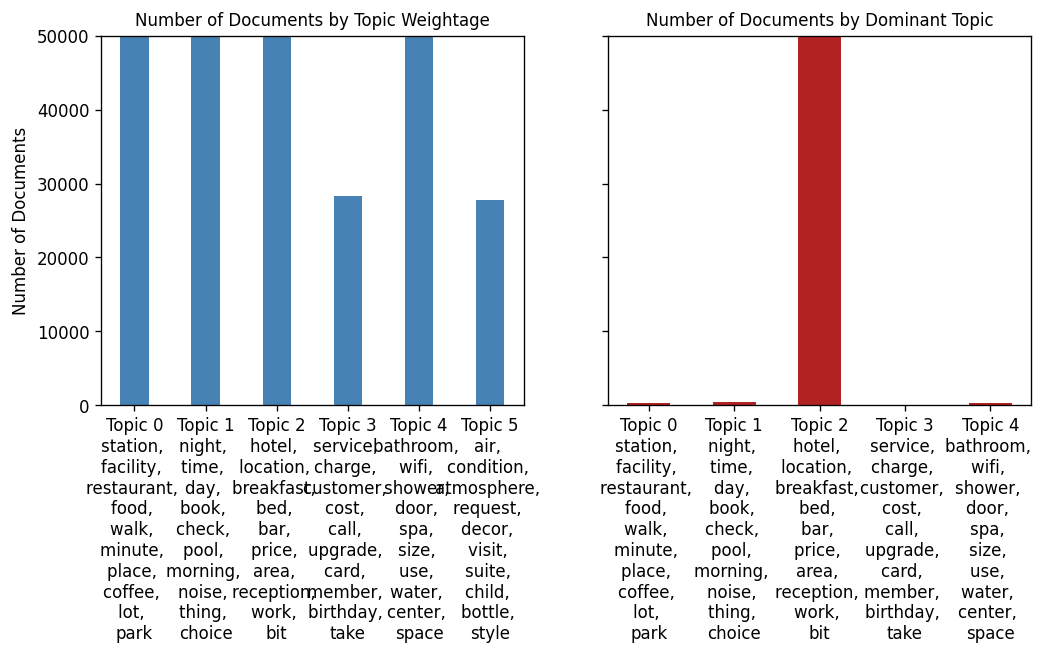

In [57]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)
# fig, ax2 = plt.subplots(1, 1, figsize=(10, 4), dpi=120, sharey=True)
# fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.4, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))
ax2.set_ylabel('Number of Documents')
ax2.set_ylim(0, 50000)


# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
#ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 50000)

plt.show()

In [58]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 6
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 505756 samples in 1.253s...
[t-SNE] Computed neighbors for 505756 samples in 133.304s...
[t-SNE] Computed conditional probabilities for sample 1000 / 505756
[t-SNE] Computed conditional probabilities for sample 2000 / 505756
[t-SNE] Computed conditional probabilities for sample 3000 / 505756
[t-SNE] Computed conditional probabilities for sample 4000 / 505756
[t-SNE] Computed conditional probabilities for sample 5000 / 505756
[t-SNE] Computed conditional probabilities for sample 6000 / 505756
[t-SNE] Computed conditional probabilities for sample 7000 / 505756
[t-SNE] Computed conditional probabilities for sample 8000 / 505756
[t-SNE] Computed conditional probabilities for sample 9000 / 505756
[t-SNE] Computed conditional probabilities for sample 10000 / 505756
[t-SNE] Computed conditional probabilities for sample 11000 / 505756
[t-SNE] Computed conditional probabilities for sample 12000 / 505756
[t-SNE] Computed conditional proba

KeyboardInterrupt: ignored

In [59]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.365217 -0.001798       1        1  43.855005
0     -0.157834  0.040578       2        1  16.718347
1      0.208543  0.276678       3        1  15.096896
4      0.150053 -0.393799       4        1  13.211754
3      0.096665  0.063322       5        1   5.656999
5      0.067790  0.015020       6        1   5.460999, topic_info=           Term           Freq          Total Category  logprob  loglift
20        hotel  208328.000000  208328.000000  Default  30.0000  30.0000
64     location  197771.000000  197771.000000  Default  29.0000  29.0000
74      service   47845.000000   47845.000000  Default  28.0000  28.0000
81    breakfast  151281.000000  151281.000000  Default  27.0000  27.0000
183    bathroom   43092.000000   43092.000000  Default  26.0000  26.0000
..          ...            ...            ...      ...      ...      ...
708         fix    1979.808960    1980.634149   Topic6  -4.6038   2.9071
409       state    1955.703628    1956.530504   Topic6  -4.6161   2.9071
632  impression    1920.629910    1921.457132   Topic6  -4.6342   2.9071
606   transport    1886.837590    1887.661085   Topic6  -4.6519   2.9071
593        vibe    1857.357349    1858.183498   Topic6  -4.6677   2.9071

[210 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
282       1  0.999915   access
576       6  0.999951      air
419       5  0.999882  airport
87        1  0.999989     area
0         3  0.999824  arrival
...     ...       ...      ...
312       4  0.999960     wifi
55        1  0.999941   window
474       5  0.999655     wine
167       1  0.999985     work
884       3  0.999851     year

[180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 5, 4, 6])